In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

red = "#D81B60"
yellow = "#FFC107"
blue = "#1E88E5"
green = "#004D40"
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [5]:
import sklearn.metrics
rootpath = "D:\\HPI\\docker\\csv_bert\\results\\dialect\\"
df_dicts = []
result_path = f"_test_original_results.csv"

results_df = {}
for sys in ["magritte", "clevercs"]:
    df = pd.read_csv(rootpath + sys + result_path+"_0")
    df = df.rename(columns={"prediction_time": "prediction_time_0"})
    for i in range(1,5):
        tmp_df = pd.read_csv(rootpath + sys + result_path+f"_{i}", sep=",", quotechar='"')
        tmp_df = tmp_df.rename(columns={"prediction_time": f"prediction_time_{i}"})
        df = pd.merge(df, tmp_df[[f"prediction_time_{i}"]], left_index=True, right_index=True, how="outer")   
        del tmp_df
    df["mean_time"] = df[[f"prediction_time_{i}" for i in range(5)]].mean(axis=1)
    results_df[sys] = df
    del df

Df size 8696
Df size 5435


CleverCSV:  0.0394442758
Magritte:  0.031370333600000286


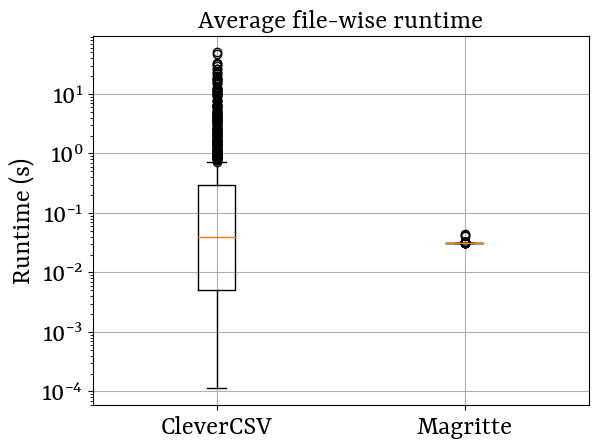

In [52]:
plt.rcParams['font.family'] = 'Rasa'
labelsize = 20

results_df["clevercs"]
plt.boxplot([results_df["clevercs"]["mean_time"],results_df["magritte"]["mean_time"]],
            # palette = [blue, red],
            labels=["CleverCSV", "Magritte"])
# change fontsize of labels
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.yscale("log")
plt.title("Average file-wise runtime", size=labelsize);
plt.ylabel("Runtime (s)", size=labelsize);

print("CleverCSV: ", results_df["clevercs"]["mean_time"].median())
print("Magritte: ", results_df["magritte"]["mean_time"].median())
# add the tick 0.03 to the x-axis, with the label '0.03'

plt.grid()
plt.show() 




c:\Users\Gerardo\miniconda3\envs\magritte\Lib\site-packages\matplotlib\axes\_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
c:\Users\Gerardo\miniconda3\envs\magritte\Lib\site-packages\matplotlib\axes\_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


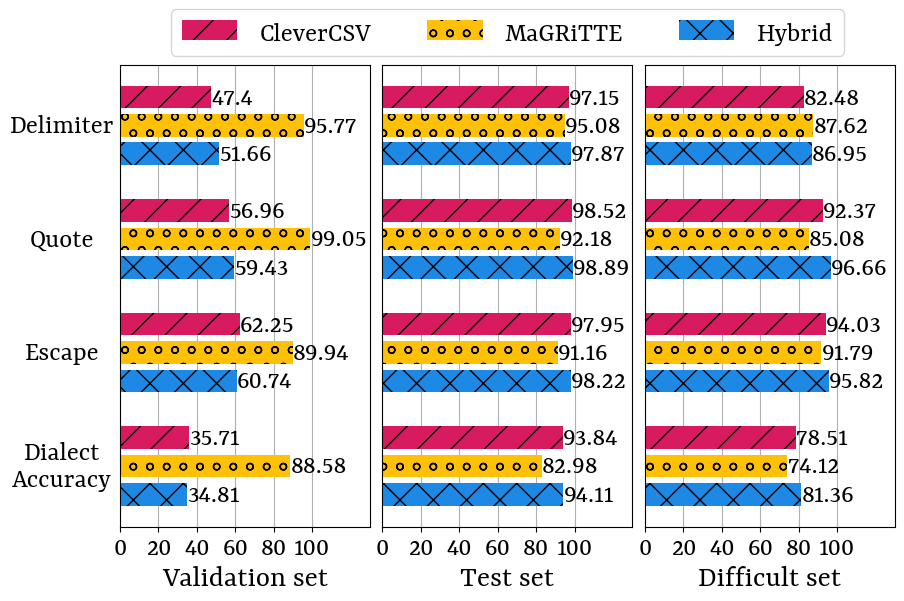

In [9]:
from matplotlib.patches import Patch

plt.rcParams['font.family'] = 'Rasa'
labelsize = 20

colors = [red, yellow, blue]
patterns = ['/', 'o', 'x']

def plot_bar(ax, title, bar1,bar2,bar3,bar4):
  ax.grid(zorder=-10)
  ax.set_axisbelow(True)

  ax.barh([0,1,2],    bar1, color=colors, hatch=patterns, xerr=std["magritte"][bar1.name])
  ax.barh([4,5,6],    bar2, color=colors, hatch=patterns, xerr=std["magritte"][bar2.name])
  ax.barh([8,9,10],   bar3, color=colors, hatch=patterns, xerr=std["magritte"][bar3.name])
  ax.barh([12,13,14], bar4, color=colors, hatch=patterns, xerr=std["magritte"][bar4.name])
  ax.invert_yaxis()
  # add a legend
  # plt.legend(['No augmentation', 'Synonym', 'Backtranslation'], loc='upper left', bbox_to_anchor=(1, 1), fontsize=labelsize)

  # write numbers on top of the bars
  ypad =0
  xpad=.02
  for j, bar in enumerate([bar1, bar2, bar3, bar4]):
    for i, v in enumerate(bar):
      ax.text(v+xpad, (j*4)+i+ypad, str(round(v, 2)), color='black', size=labelsize, va='center')


  # only have the corresponding x labels corresponding to the middle bar of each plot
  ax.set_yticks([])
  #
  ax.set_xlabel(title, size=labelsize+2);
  ticks = [0, 20, 40, 60, 80, 100]
  ax.set_xticks(ticks=ticks, labels=ticks,size=labelsize);
  ax.set_xlim(0, 130)
  # plt.title("Dialect detection results", size=labelsize+2);

fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(nrows=1,ncols=3, wspace=0.05)
axs = gs.subplots(sharey=True)

bars = [res[f"dev_f1_{x}"] for x in ["delimiter", "quotechar", "escapechar"]] + [res["dev_accuracy"]]
plot_bar(axs[0], 'Validation set', *bars)

# stack another plot on the right of the first one reusing the same y axis
bars = [res[f"test_f1_{x}"] for x in ["delimiter", "quotechar", "escapechar"]] + [res["test_accuracy"]]
plot_bar(axs[1], 'Test set', *bars)

bars = [res[f"weird_f1_{x}"] for x in ["delimiter", "quotechar", "escapechar"]] + [res["weird_accuracy"]]
plot_bar(axs[2], 'Difficult set', *bars)

xpoint = -30
axs[0].text(xpoint, 1, 'Delimiter', ha='center', va='center', size=labelsize)
axs[0].text(xpoint, 5, 'Quote', ha='center', va='center', size=labelsize)
axs[0].text(xpoint, 9, 'Escape', ha='center', va='center', size=labelsize)
axs[0].text(xpoint, 13, 'Dialect\nAccuracy', ha='center', va='center', size=labelsize)

# add a legend
custom_bars = [Patch(facecolor=colors[0], hatch=patterns[0]),
               Patch(facecolor=colors[1], hatch=patterns[1]),
               Patch(facecolor=colors[2], hatch=patterns[2]),]

axs[1].legend(handles=custom_bars,
              labels = ["CleverCSV", "MaGRiTTE", "Hybrid"] , #[x.capitalize() for x in res.index],
              loc='center',
              bbox_to_anchor=(0.5, 1.07),
              ncols=3,
              fontsize=labelsize)

plt.savefig('dialect_new_results.png', dpi=300, bbox_inches='tight')

Magritte
F1 weighted:  0.9158393653887914
F1 macro:  0.2448001728770884
F1 micro:  0.9103825136612022
Clevercsv
F1 weighted:  0.3867685090175581
F1 macro:  0.163597996526876
F1 micro:  0.5046448087431694


c:\Users\Gerardo\miniconda3\envs\magritte\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.draw()
c:\Users\Gerardo\miniconda3\envs\magritte\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  func(*args, **kwargs)


3660
3503


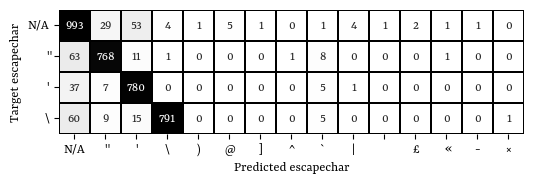

c:\Users\Gerardo\miniconda3\envs\magritte\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


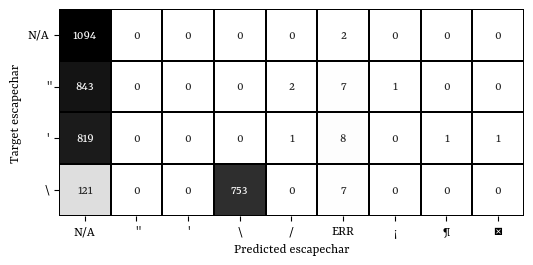

In [134]:
import contextlib
import seaborn as sns
import sklearn.metrics

# Test
# magritte_test = pd.read_csv("D:\\HPI\\docker\\csv_bert\\experiments\\finetune_dialect\\magritte_test_original_results.csv").fillna("")
# clevercs_test = pd.read_csv("D:\\HPI\\docker\\csv_bert\\experiments\\finetune_dialect\\clevercs_test_original_results.csv").fillna("")

# Weird
# magritte_weird = pd.read_csv("D:\\HPI\\docker\\csv_bert\\experiments\\finetune_dialect\\magritte_weird_original_results.csv").fillna("")
# clevercs_weird = pd.read_csv("D:\\HPI\\docker\\csv_bert\\experiments\\finetune_dialect\\clevercs_weird_original_results.csv").fillna("")

# magritte = pd.concat([magritte_test, magritte_weird], axis=0)
# clevercs = pd.concat([clevercs_test, clevercs_weird], axis=0)

def plot_cm(df, classification_class):
#plot a confusion matrix between the predicted_delimiter and the target_delimiter columns
    y_pred = df[f"predicted_{classification_class}"]
    y_true = df[f"target_{classification_class}"]
    labels = sorted(y_true.unique())
    labels += sorted([x for x in y_pred.unique() if x not in labels])
    matrix = sklearn.metrics.confusion_matrix(y_true, y_pred, labels=labels)
    matrix = matrix[~np.all(matrix == 0, axis=1)]

    print("F1 weighted: ", sklearn.metrics.f1_score(y_true, y_pred, average="weighted"))
    print("F1 macro: ", sklearn.metrics.f1_score(y_true, y_pred, average="macro"))
    print("F1 micro: ", sklearn.metrics.f1_score(y_true, y_pred, average="micro"))

    with contextlib.suppress(ValueError):
        labels[labels.index("\x09")] = "\\t"
    with contextlib.suppress(ValueError):
        labels[labels.index('')] = "N/A"
    with contextlib.suppress(ValueError):
        labels[labels.index(" ")] = "\\s"
    with contextlib.suppress(ValueError):
        labels[labels.index("[UNK]")] = "ERR"
    # draw matrix in matplotlib
    fig, ax  = plt.subplots(figsize=(6, 6))
    # im = ax.matshow(matrix, cmap=plt.cm.Blues, alpha)
    sns.heatmap(matrix, 
                cmap='binary', 
                # vmin=0,
                # vmax=100,
                linecolor='black',
                linewidths=.25,
                robust=True,
                xticklabels=labels, 
                yticklabels=labels[:len(matrix[:,0])], 
                annot=True, 
                fmt='d', 
                cbar=False,
                square=True, 
                )

    # rotate the y ticks 90 degrees
    plt.yticks(rotation=0)
    ax.set_xlabel("Predicted "+classification_class)
    ax.set_ylabel("Target "+classification_class)

dataset ="dev"
print("Magritte")
plot_cm(results_df[dataset]["magritte"], "escapechar")

print("Clevercsv")
plot_cm(results_df[dataset]["clevercsv"], "escapechar")
# print()

df = results_df[dataset]["clevercsv"]
# select only rows if ""augmented" not in filename"
print(len(df))
df = df[df["filename"].str.contains("augmented")]
print(len(df))


Num unique dialects 180
Num unique delimiters 11
Num unique quotechars 5
Num unique escapechars 4
Magritte
F1 weighted:  0.9943784881216776
F1 macro:  0.44850872344362697
F1 micro:  0.9931693989071039
Clevercsv
F1 weighted:  0.5888410852483865
F1 macro:  0.43085590900020376
F1 micro:  0.5792349726775956


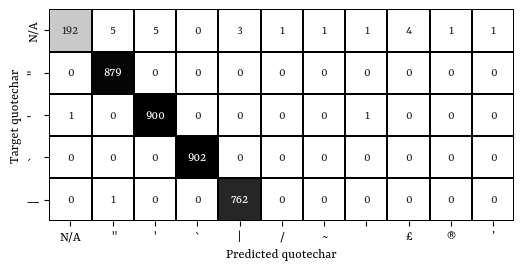

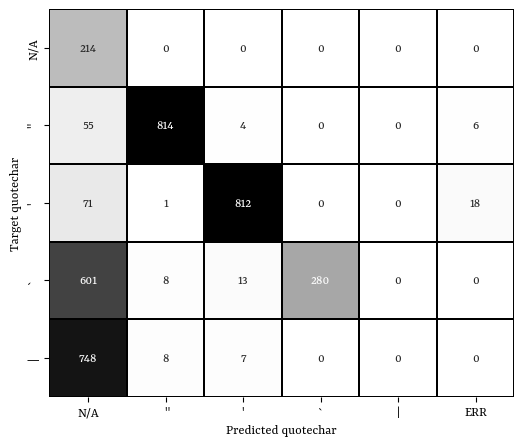

In [30]:
magritte["dialect"] = magritte["target_delimiter"] + magritte["target_quotechar"] + magritte["target_escapechar"]
dialects = magritte["dialect"].unique()
print("Num unique dialects", len(dialects))
print("Num unique delimiters", len(magritte["target_delimiter"].unique()))
print("Num unique quotechars", len(magritte["target_quotechar"].unique()))
print("Num unique escapechars", len(magritte["target_escapechar"].unique()))

print("Magritte")
plot_cm(magritte, "quotechar")
print("Clevercsv")
plot_cm(clevercs, "quotechar")


Magritte
F1 weighted:  0.9158393653887914
F1 macro:  0.2448001728770884
F1 micro:  0.9103825136612022
Clevercsv
F1 weighted:  0.3867685090175581
F1 macro:  0.163597996526876
F1 micro:  0.5046448087431694


c:\Users\Gerardo\miniconda3\envs\magritte\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.draw()
c:\Users\Gerardo\miniconda3\envs\magritte\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  func(*args, **kwargs)


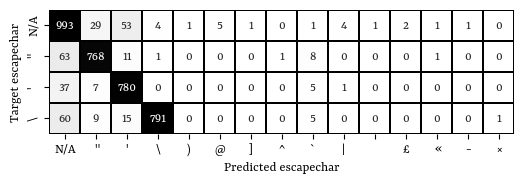

c:\Users\Gerardo\miniconda3\envs\magritte\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


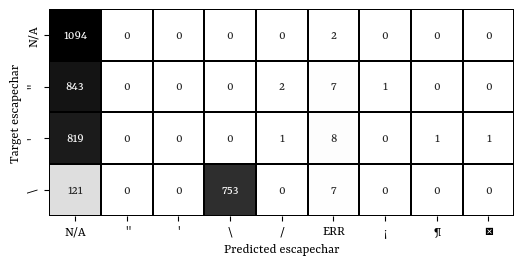

In [31]:
print("Magritte")
plot_cm(magritte, "escapechar")
print("Clevercsv")
plot_cm(clevercs, "escapechar")

In [188]:
# df = results_df["test"]["hybrid"]
df = results_df["test"]["magritte"]

df["accuracy"] = (df["predicted_delimiter"]== df["target_delimiter"]) &\
(df["predicted_quotechar"]== df["target_quotechar"]) &\
(df["predicted_escapechar"]== df["target_escapechar"])

# df[~df["accuracy"]]
df[(df["predicted_escapechar"]!= df["target_escapechar"])][["filename","predicted_escapechar","target_escapechar"]]

df["predicted_dialect"] = df["predicted_delimiter"] + df["predicted_quotechar"] + df["predicted_escapechar"]
df["dialect"] = df["target_delimiter"] + df["target_quotechar"] + df["target_escapechar"]
df.groupby("dialect").count()["filename"]
# df.groupby("predicted_dialect").count()["filename"]

Magritte accuracy 0.7900194426441997
Clevercsv accuracy 0.8930654569021387


[[210   0   2   0   2   0   0   0   0   0   0   0   0   0   0]
 [234 231 199   0   0   1   1 211   1   0   0   0   1   0   0]
 [242 227 231   0   0   0   0 200   0   0   0   1   0   1   0]
 [251 188 230  19   0   0   3 208   0   1   1   0   1   0   0]
 [216 167 197   0   3   0   1 177   0   0   0   1   0   0   1]]


<Axes: >

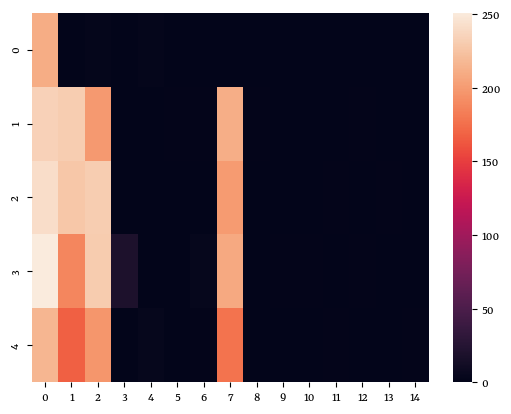